In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [94]:
#Loading the dataset
csv_data = pd.read_excel("/content/drive/MyDrive/QSAR/Dataset/padel_compiledata_descriptor2.xlsx")
print(csv_data.dtypes)

CdId                          int64
Smiles                       object
Mol Weight                  float64
LogD                        float64
TPSA                        float64
Strongest acidic pKa        float64
Strongest basic pKa         float64
H bond acceptors              int64
H bond donors                 int64
Rotatable bonds               int64
Atom count                    int64
Chiral atoms                  int64
Bond count                    int64
Ring count                    int64
Asymmetric atoms              int64
ESOL Log S                  float64
Ali Log S                   float64
Silicos-IT LogSw            float64
log Kp (cm/s)               float64
Lipinski #violations          int64
Ghose #violations             int64
Bioavailability Score       float64
Leadlikeness #violations      int64
LogP                        float64
BBB                         float64
iLOGP                       float64
XLOGP3                      float64
WLOGP                       

In [95]:
csv_data.head(20)

,CdId,Smiles,Mol Weight,LogD,TPSA,Strongest acidic pKa,Strongest basic pKa,H bond acceptors,H bond donors,Rotatable bonds,...,LogP,BBB,iLOGP,XLOGP3,WLOGP,MLOGP,Silicos-IT Log P,Fraction Csp3,MR,logPapp
0,1,OC1Cc2c(O)cc(O)cc2OC1c1ccc(O)c(O)c1,290.271,1.784451,110.38,9.004574,-3.289719,6,5,1,...,1.795107,-1.221768,1.47,0.36,1.22,0.24,0.98,0.20,74.33,-6.22000
1,2,CC=CC#CCCC=CC=CC(=O)NCC(C)C,245.366,3.998032,29.10,16.028100,-0.134157,1,1,8,...,3.998032,0.316021,3.70,3.97,3.31,3.41,4.04,0.44,78.77,-3.86000
2,3,CCCCN1CCN(CC1C)c1cc2n(cc(C(O)=O)c(=O)c2cc1F)C1CC1,401.482,1.326124,64.09,5.554172,7.997420,6,1,6,...,1.370401,-0.601231,2.78,1.07,3.08,2.41,3.10,0.55,119.38,-4.86000
3,4,COc1ccc2C[C@@H]3[C@@H]4C=C[C@H](O)[C@@H]5Oc1c2...,299.370,-0.448374,41.93,13.782739,9.192785,4,1,1,...,1.342951,-0.277435,2.67,1.14,1.12,1.98,1.86,0.56,86.74,-4.09000
4,5,O=c1ccc2ccccc2o1,146.145,1.783360,26.30,NaN,-6.940142,1,0,0,...,1.783360,0.020831,1.75,1.39,1.79,1.65,2.50,0.00,42.48,-4.25000
5,6,CN1CC(=O)NC1=N,113.120,-1.066458,56.19,10.453649,4.962595,3,2,0,...,-1.064483,-0.854413,0.71,-1.76,-1.78,-0.93,-0.14,0.50,36.55,-5.93541
6,7,Oc1ccc(cc1)-c1coc2cc(O)ccc2c1=O,254.241,1.772450,66.76,6.476840,-5.336102,4,2,1,...,2.730438,-0.434021,1.77,2.47,2.87,1.08,3.02,0.00,71.97,-4.68000
7,8,C[C@]12CC[C@H]3[C@@H](CCC4=Cc5oncc5C[C@]34C)[C...,337.463,3.462082,46.26,17.594932,0.246258,2,1,0,...,3.462082,-0.019412,3.36,3.70,4.19,3.97,4.27,0.68,98.86,-4.84000
8,9,Oc1ccc(CCC(=O)c2ccc(O)cc2O)cc1,258.273,3.418517,77.76,7.855788,-4.908505,4,3,4,...,3.549106,-0.472384,1.97,2.98,2.62,1.66,2.65,0.13,72.00,-4.74000
9,10,C[C@@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C...,392.467,1.681566,94.83,12.424778,-3.330176,5,3,2,...,1.681570,-1.008885,2.29,1.94,2.32,1.62,2.58,0.73,101.96,-4.83000


In [96]:
print(csv_data.columns)

Index(['CdId', 'Smiles', 'Mol Weight', 'LogD', 'TPSA', 'Strongest acidic pKa',
       'Strongest basic pKa', 'H bond acceptors', 'H bond donors',
       'Rotatable bonds', 'Atom count', 'Chiral atoms', 'Bond count',
       'Ring count', 'Asymmetric atoms', 'ESOL Log S', 'Ali Log S',
       'Silicos-IT LogSw', 'log Kp (cm/s)', 'Lipinski #violations',
       'Ghose #violations', 'Bioavailability Score',
       'Leadlikeness #violations', 'LogP', 'BBB', 'iLOGP', 'XLOGP3', 'WLOGP',
       'MLOGP', 'Silicos-IT Log P', 'Fraction Csp3', 'MR', 'logPapp'],
      dtype='object')


In [98]:
print(csv_data.columns)

Index(['CdId', 'Smiles', 'Mol Weight', 'LogD', 'TPSA', 'Strongest acidic pKa',
       'Strongest basic pKa', 'H bond acceptors', 'H bond donors',
       'Rotatable bonds', 'Atom count', 'Chiral atoms', 'Bond count',
       'Ring count', 'Asymmetric atoms', 'ESOL Log S', 'Ali Log S',
       'Silicos-IT LogSw', 'log Kp (cm/s)', 'Lipinski #violations',
       'Ghose #violations', 'Bioavailability Score',
       'Leadlikeness #violations', 'LogP', 'BBB', 'iLOGP', 'XLOGP3', 'WLOGP',
       'MLOGP', 'Silicos-IT Log P', 'Fraction Csp3', 'MR', 'logPapp'],
      dtype='object')


In [99]:
print(csv_data.dtypes)


CdId                          int64
Smiles                       object
Mol Weight                  float64
LogD                        float64
TPSA                        float64
Strongest acidic pKa        float64
Strongest basic pKa         float64
H bond acceptors              int64
H bond donors                 int64
Rotatable bonds               int64
Atom count                    int64
Chiral atoms                  int64
Bond count                    int64
Ring count                    int64
Asymmetric atoms              int64
ESOL Log S                  float64
Ali Log S                   float64
Silicos-IT LogSw            float64
log Kp (cm/s)               float64
Lipinski #violations          int64
Ghose #violations             int64
Bioavailability Score       float64
Leadlikeness #violations      int64
LogP                        float64
BBB                         float64
iLOGP                       float64
XLOGP3                      float64
WLOGP                       

In [100]:
#Dropping the non-numeric column in the dataset
csv_data = csv_data.drop('Smiles' , axis=1)

In [101]:
print(csv_data.columns)

Index(['CdId', 'Mol Weight', 'LogD', 'TPSA', 'Strongest acidic pKa',
       'Strongest basic pKa', 'H bond acceptors', 'H bond donors',
       'Rotatable bonds', 'Atom count', 'Chiral atoms', 'Bond count',
       'Ring count', 'Asymmetric atoms', 'ESOL Log S', 'Ali Log S',
       'Silicos-IT LogSw', 'log Kp (cm/s)', 'Lipinski #violations',
       'Ghose #violations', 'Bioavailability Score',
       'Leadlikeness #violations', 'LogP', 'BBB', 'iLOGP', 'XLOGP3', 'WLOGP',
       'MLOGP', 'Silicos-IT Log P', 'Fraction Csp3', 'MR', 'logPapp'],
      dtype='object')


In [102]:
print(csv_data.dtypes)

CdId                          int64
Mol Weight                  float64
LogD                        float64
TPSA                        float64
Strongest acidic pKa        float64
Strongest basic pKa         float64
H bond acceptors              int64
H bond donors                 int64
Rotatable bonds               int64
Atom count                    int64
Chiral atoms                  int64
Bond count                    int64
Ring count                    int64
Asymmetric atoms              int64
ESOL Log S                  float64
Ali Log S                   float64
Silicos-IT LogSw            float64
log Kp (cm/s)               float64
Lipinski #violations          int64
Ghose #violations             int64
Bioavailability Score       float64
Leadlikeness #violations      int64
LogP                        float64
BBB                         float64
iLOGP                       float64
XLOGP3                      float64
WLOGP                       float64
MLOGP                       

In [103]:
csv_data = csv_data.astype(float)

In [104]:
print(csv_data.dtypes)

CdId                        float64
Mol Weight                  float64
LogD                        float64
TPSA                        float64
Strongest acidic pKa        float64
Strongest basic pKa         float64
H bond acceptors            float64
H bond donors               float64
Rotatable bonds             float64
Atom count                  float64
Chiral atoms                float64
Bond count                  float64
Ring count                  float64
Asymmetric atoms            float64
ESOL Log S                  float64
Ali Log S                   float64
Silicos-IT LogSw            float64
log Kp (cm/s)               float64
Lipinski #violations        float64
Ghose #violations           float64
Bioavailability Score       float64
Leadlikeness #violations    float64
LogP                        float64
BBB                         float64
iLOGP                       float64
XLOGP3                      float64
WLOGP                       float64
MLOGP                       

In [105]:
csv_data

,CdId,Mol Weight,LogD,TPSA,Strongest acidic pKa,Strongest basic pKa,H bond acceptors,H bond donors,Rotatable bonds,Atom count,...,LogP,BBB,iLOGP,XLOGP3,WLOGP,MLOGP,Silicos-IT Log P,Fraction Csp3,MR,logPapp
0,1.0,290.271,1.784451,110.38,9.004574,-3.289719,6.0,5.0,1.0,35.0,...,1.795107,-1.221768,1.47,0.36,1.22,0.24,0.98,0.20,74.33,-6.22
1,2.0,245.366,3.998032,29.10,16.028100,-0.134157,1.0,1.0,8.0,41.0,...,3.998032,0.316021,3.70,3.97,3.31,3.41,4.04,0.44,78.77,-3.86
2,3.0,401.482,1.326124,64.09,5.554172,7.997420,6.0,1.0,6.0,57.0,...,1.370401,-0.601231,2.78,1.07,3.08,2.41,3.10,0.55,119.38,-4.86
3,4.0,299.370,-0.448374,41.93,13.782739,9.192785,4.0,1.0,1.0,43.0,...,1.342951,-0.277435,2.67,1.14,1.12,1.98,1.86,0.56,86.74,-4.09
4,5.0,146.145,1.783360,26.30,NaN,-6.940142,1.0,0.0,0.0,17.0,...,1.783360,0.020831,1.75,1.39,1.79,1.65,2.50,0.00,42.48,-4.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,1243.0,572.566,4.452317,126.80,13.224436,-2.614710,6.0,1.0,10.0,70.0,...,4.452318,-1.060888,4.24,5.49,5.95,1.78,6.38,0.25,155.65,-4.48
1243,1244.0,172.268,1.174230,37.30,4.952020,NaN,2.0,1.0,8.0,32.0,...,3.589171,0.132514,2.50,4.09,3.21,2.58,2.63,0.90,51.96,-4.68
1244,1245.0,703.880,6.148137,128.20,11.811335,2.212864,6.0,4.0,16.0,101.0,...,6.148155,-0.823840,4.82,6.47,4.97,3.82,6.66,0.33,202.99,-5.08
1245,1246.0,719.830,3.325976,156.89,3.820528,2.815311,9.0,2.0,6.0,93.0,...,4.090745,-1.561179,4.28,4.36,4.88,2.44,3.50,0.49,196.02,-5.30


In [106]:
# Check the initial DataFrame
print("Before dropping:")
print(csv_data)

Before dropping:
        CdId  Mol Weight      LogD    TPSA  Strongest acidic pKa  \
0        1.0     290.271  1.784451  110.38              9.004574   
1        2.0     245.366  3.998032   29.10             16.028100   
2        3.0     401.482  1.326124   64.09              5.554172   
3        4.0     299.370 -0.448374   41.93             13.782739   
4        5.0     146.145  1.783360   26.30                   NaN   
...      ...         ...       ...     ...                   ...   
1242  1243.0     572.566  4.452317  126.80             13.224436   
1243  1244.0     172.268  1.174230   37.30              4.952020   
1244  1245.0     703.880  6.148137  128.20             11.811335   
1245  1246.0     719.830  3.325976  156.89              3.820528   
1246  1247.0     281.352  0.904748   83.47             11.799869   

      Strongest basic pKa  H bond acceptors  H bond donors  Rotatable bonds  \
0               -3.289719               6.0            5.0              1.0   
1       

In [108]:
# Drop columns that are not of float data type
for column in csv_data.columns:
    if csv_data[column].dtype != float:
        csv_data = csv_data.drop(column, axis=1)

In [109]:
print("\nAfter dropping:")
print(csv_data)


After dropping:
        CdId  Mol Weight      LogD    TPSA  Strongest acidic pKa  \
0        1.0     290.271  1.784451  110.38              9.004574   
1        2.0     245.366  3.998032   29.10             16.028100   
2        3.0     401.482  1.326124   64.09              5.554172   
3        4.0     299.370 -0.448374   41.93             13.782739   
4        5.0     146.145  1.783360   26.30                   NaN   
...      ...         ...       ...     ...                   ...   
1242  1243.0     572.566  4.452317  126.80             13.224436   
1243  1244.0     172.268  1.174230   37.30              4.952020   
1244  1245.0     703.880  6.148137  128.20             11.811335   
1245  1246.0     719.830  3.325976  156.89              3.820528   
1246  1247.0     281.352  0.904748   83.47             11.799869   

      Strongest basic pKa  H bond acceptors  H bond donors  Rotatable bonds  \
0               -3.289719               6.0            5.0              1.0   
1       

In [110]:
#Checking if all the columns are of the same type(float)
all_float = all(csv_data[column].dtype == float for column in csv_data.columns)

# Print the result
if all_float:
    print("All columns have float data type")
else:
    print("Not all columns have float data type")

All columns have float data type


In [111]:
print(csv_data.dtypes)

CdId                        float64
Mol Weight                  float64
LogD                        float64
TPSA                        float64
Strongest acidic pKa        float64
Strongest basic pKa         float64
H bond acceptors            float64
H bond donors               float64
Rotatable bonds             float64
Atom count                  float64
Chiral atoms                float64
Bond count                  float64
Ring count                  float64
Asymmetric atoms            float64
ESOL Log S                  float64
Ali Log S                   float64
Silicos-IT LogSw            float64
log Kp (cm/s)               float64
Lipinski #violations        float64
Ghose #violations           float64
Bioavailability Score       float64
Leadlikeness #violations    float64
LogP                        float64
BBB                         float64
iLOGP                       float64
XLOGP3                      float64
WLOGP                       float64
MLOGP                       

In [112]:
# Masking NaN values in all columns
masked_csv_data = csv_data.fillna(0)
# Printing the masked DataFrame
print(masked_csv_data)

        CdId  Mol Weight      LogD    TPSA  Strongest acidic pKa  \
0        1.0     290.271  1.784451  110.38              9.004574   
1        2.0     245.366  3.998032   29.10             16.028100   
2        3.0     401.482  1.326124   64.09              5.554172   
3        4.0     299.370 -0.448374   41.93             13.782739   
4        5.0     146.145  1.783360   26.30              0.000000   
...      ...         ...       ...     ...                   ...   
1242  1243.0     572.566  4.452317  126.80             13.224436   
1243  1244.0     172.268  1.174230   37.30              4.952020   
1244  1245.0     703.880  6.148137  128.20             11.811335   
1245  1246.0     719.830  3.325976  156.89              3.820528   
1246  1247.0     281.352  0.904748   83.47             11.799869   

      Strongest basic pKa  H bond acceptors  H bond donors  Rotatable bonds  \
0               -3.289719               6.0            5.0              1.0   
1               -0.134157

In [113]:
# Split the dataset into training and testing sets
X = masked_csv_data.drop('LogP', axis=1)
y = masked_csv_data['LogP']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [114]:

# Build and fit QSAR the model
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [115]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
#y_test = np.reshape.(-1,2)

In [117]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)
print("R-squared:", r2)

threshold = 0.005
#Interpret the performance of the QSAR model
# RMSE interpretation
if rmse < threshold:
    print("The model has good predictive performance.")
else:
    print("The model's predictive performance can be improved.")

RMSE: 5.330563640429752e-14
MAE: 4.0257019939815565e-14
R-squared: 1.0
The model has good predictive performance.


In [ ]:
#An attempt by dropping columns but the problem is if it finds one single cell in any colum outside the specific range it drops it and as such the whole dataset becomes empty
# import pandas as pd
# import numpy as np

# # Assuming your dataset is stored in a pandas DataFrame called 'df'
# # You can modify this code for other data structures like NumPy arrays

# # Get the number of columns in the dataset
# num_columns = csv_data.shape[1]

# # Create a list to store the names of columns to be removed
# columns_to_remove = []

# # Iterate over each column
# for column in csv_data.columns:
#     column_values = csv_data[column]  # Get the values of the current column

#     # Check if any value falls outside the range -1 to 1
#     if np.any((column_values < 0.002)):
#         columns_to_remove.append(column)  # Add the column name to the list

# # Remove the columns from the DataFrame
# csv_data = csv_data.drop(columns=columns_to_remove)

# # Print the updated DataFrame
# print(csv_data)


In [119]:
#An attempt of masking all the data that is out of the specific range to
import pandas as pd
import numpy as np

# Assuming your dataset is stored in a pandas DataFrame called 'df'
# You can modify this code for other data structures like NumPy arrays

# Get the number of columns in the dataset
num_columns = masked_csv_data.iloc[:, :-1]

# Iterate over each column
for column in masked_csv_data.columns:
    column_values = masked_csv_data[column]  # Get the values of the current column
    #dropping the columns which have a lower value than the specified threshold value
    columns_to_drop = masked_csv_data.columns[masked_csv_data.min() < threshold]
    csv_data_filtered = masked_csv_data.drop(columns=columns_to_drop)

# Print the updated DataFrame
print(csv_data_filtered)


        CdId  Mol Weight    TPSA  H bond acceptors  Atom count  Bond count  \
0        1.0     290.271  110.38               6.0        35.0        37.0   
1        2.0     245.366   29.10               1.0        41.0        40.0   
2        3.0     401.482   64.09               6.0        57.0        60.0   
3        4.0     299.370   41.93               4.0        43.0        47.0   
4        5.0     146.145   26.30               1.0        17.0        18.0   
...      ...         ...     ...               ...         ...         ...   
1242  1243.0     572.566  126.80               6.0        70.0        75.0   
1243  1244.0     172.268   37.30               2.0        32.0        31.0   
1244  1245.0     703.880  128.20               6.0       101.0       105.0   
1245  1246.0     719.830  156.89               9.0        93.0        99.0   
1246  1247.0     281.352   83.47               4.0        43.0        44.0   

      Bioavailability Score      MR  
0                      0.

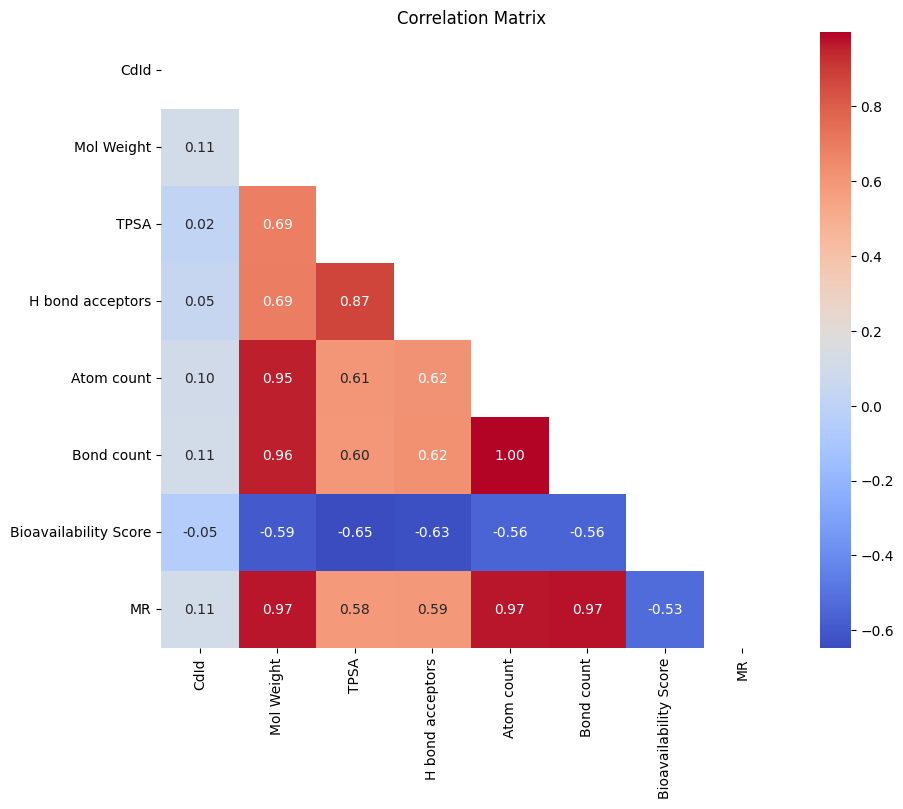

In [120]:
# Calculate the correlation matrix
corr_matrix = csv_data_filtered.corr()

# Create a mask to hide the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 8))

# Create the correlation heatmap with significance values
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# Add a title to the plot
plt.title('Correlation Matrix')

# Display the plot
plt.show()

In [129]:
#Implementing leave-one-out cross-validation (LOOCV) using linear regression and calculates the Q² value, which is a measure of model predictability
def LOOCrossValidation(csv_data_filtered):
    nvar = csv_data.shape[0]
    npar = csv_data.shape[1]

    predicted_y = np.zeros(nvar)
    y_minus_ypred = np.zeros(nvar)
    square_y_minus_ypred = np.zeros(nvar)
    y_minus_yave = np.zeros(nvar)
    square_y_minus_yave = np.zeros(nvar)


    ave_y = np.mean(csv_data_filtered["TPSA"])

    for leaving_num in range(nvar):
        loo_data = csv_data_filtered.drop(leaving_num)

        loo_lm = LinearRegression()
        loo_lm.fit(loo_data.drop("TPSA", axis=1), loo_data["TPSA"])

        y_pred = loo_lm.predict(csv_data_filtered.drop("TPSA", axis=1).iloc[[leaving_num]])
        predicted_y[leaving_num] = y_pred

        y_minus_ypred[leaving_num] = csv_data["TPSA"].iloc[leaving_num] - y_pred
        square_y_minus_ypred[leaving_num] = y_minus_ypred[leaving_num] ** 2

        y_minus_yave[leaving_num] = csv_data.filtered["TPSA"].iloc[leaving_num] - ave_y
        square_y_minus_yave[leaving_num] = y_minus_yave[leaving_num] ** 2

    q2 = 1 - np.sum(square_y_minus_ypred) / np.sum(square_y_minus_yave)
    return q2

In [130]:
print(csv_data_filtered)

        CdId  Mol Weight    TPSA  H bond acceptors  Atom count  Bond count  \
0        1.0     290.271  110.38               6.0        35.0        37.0   
1        2.0     245.366   29.10               1.0        41.0        40.0   
2        3.0     401.482   64.09               6.0        57.0        60.0   
3        4.0     299.370   41.93               4.0        43.0        47.0   
4        5.0     146.145   26.30               1.0        17.0        18.0   
...      ...         ...     ...               ...         ...         ...   
1242  1243.0     572.566  126.80               6.0        70.0        75.0   
1243  1244.0     172.268   37.30               2.0        32.0        31.0   
1244  1245.0     703.880  128.20               6.0       101.0       105.0   
1245  1246.0     719.830  156.89               9.0        93.0        99.0   
1246  1247.0     281.352   83.47               4.0        43.0        44.0   

      Bioavailability Score      MR  
0                      0.

In [131]:
print(csv_data_filtered.columns)

Index(['CdId', 'Mol Weight', 'TPSA', 'H bond acceptors', 'Atom count',
       'Bond count', 'Bioavailability Score', 'MR'],
      dtype='object')


In [132]:
print(csv_data_filtered.dtypes)

CdId                     float64
Mol Weight               float64
TPSA                     float64
H bond acceptors         float64
Atom count               float64
Bond count               float64
Bioavailability Score    float64
MR                       float64
dtype: object


In [133]:
# #Checking if all the columns are of the same type(float)
# all_float = all(csv_data_filtered[column].dtype == float for column in csv_data_filtered.columns)

# # Print the result
# if all_float:
#     print("All columns have float data type")
# else:
#     print("Not all columns have float data type")

In [134]:
# # Masking NaN values in all columns
# masked_csv_data_filtered = csv_data_filtered.mask(pd.isna)
# # Printing the masked DataFrame
# print(masked_csv_data_filtered)

In [135]:
#Implementing a leave-one-out cross-validation method to predict the target variable 'y' using linear regression.
def LOOPredictY(csv_data_filtered):
    nvar = csv_data_filtered.shape[0]
    predicted_y = np.zeros(nvar)

    for leaving_num in range(nvar):
        loo_data = csv_data_filtered.drop(leaving_num)

        loo_lm = LinearRegression()
        loo_lm.fit(loo_data.drop("TPSA", axis=1), loo_data["TPSA"])

        y_pred = loo_lm.predict(csv_data_filtered.drop("TPSA", axis=1).iloc[[leaving_num]])
        predicted_y[leaving_num] = y_pred

    return predicted_y

In [136]:
#This code defines a function called RmSquare that calculates various metrics related to the goodness of fit of a model's predictions (Ypred) compared to the observed values
def RmSquare(Yobs, Ypred):
    k = np.sum(Yobs * Ypred) / np.sum(Ypred ** 2)
    k1 = np.sum(Yobs * Ypred) / np.sum(Yobs ** 2)
    R_square = (np.sum((Yobs - np.mean(Yobs)) * (Ypred - np.mean(Ypred)))) ** 2 / (
            np.sum((Ypred - np.mean(Ypred)) ** 2) * np.sum((Yobs - np.mean(Yobs)) ** 2))
    Ro_square = 1 - np.sum((Yobs - k * Ypred) ** 2) / np.sum((Yobs - np.mean(Yobs)) ** 2)
    Ro1_square = 1 - np.sum((Ypred - k1 * Yobs) ** 2) / np.sum((Ypred - np.mean(Ypred)) ** 2)
    delta_R_square = R_square - Ro_square
    print("R^2 =", R_square)
    print("Adjusted R^2 =", Ro_square)
    print("Q^2 =", Ro1_square)
    print("Delta R^2 =", delta_R_square)

In [137]:
#Scaling the data
def ScaleData(Yi, minYobs, maxYobs):
    return (Yi - minYobs) / (maxYobs - minYobs)

In [138]:
#It calculates the R-squared (R²) values for both the original and scaled versions of observed and predicted data.
def RmSquareMatrix(obs_y, pred_y):
    print("\n--------- Rm² Calculation ---------\n")

    # Calculation of Rm² for the original data
    rm2_orig = RmSquare(obs_y, pred_y)

    # Scaling the data
    min_y = np.min(obs_y)
    max_y = np.max(obs_y)
    scaled_obs_y = ScaleData(obs_y, min_y, max_y)
    scaled_pred_y = ScaleData(pred_y, min_y, max_y)

    # Calculation of Rm² for the scaled data
    rm2_scaled = RmSquare(scaled_obs_y, scaled_pred_y)

In [140]:
#implementing yRandomization
def yRandomization(masked_csv_data_filtered, NumOfIteration):
    nvar = masked_csv_data_filtered.shape[0]
    original_y = masked_csv_data_filtered["TPSA"]

    # Original model
    original_lm = LinearRegression()
    original_lm.fit(masked_csv_data_filtered.drop("TPSA", axis=1), original_y)
    original_y_pred = original_lm.predict(masked_csv_data_filtered.drop("TPSA", axis=1))

    print("Original Model:")
    RmSquareMatrix(original_y, original_y_pred)

    for iteration in range(NumOfIteration):
        randomized_y = np.random.permutation(original_y)

        randomized_data = masked_csv_data_filtered.copy()
        randomized_data["TPSA"] = randomized_y

        randomized_lm = LinearRegression()
        randomized_lm.fit(randomized_data.drop("TPSA", axis=1), randomized_y)
        randomized_y_pred = randomized_lm.predict(masked_csv_data_filtered.drop("TPSA", axis=1))

        print(f"\nRandomized Model {iteration + 1}:")
        RmSquareMatrix(original_y, randomized_y_pred)

In [141]:
yRandomization(csv_data_filtered, NumOfIteration=50)

Original Model:

--------- Rm² Calculation ---------

R^2 = 0.8451614461695475
Adjusted R^2 = 0.8451614461695474
Q^2 = 0.8231609273618906
Delta R^2 = 1.1102230246251565e-16
R^2 = 0.8451614461695476
Adjusted R^2 = 0.8451614461695474
Q^2 = 0.8235096433608534
Delta R^2 = 2.220446049250313e-16

Randomized Model 1:

--------- Rm² Calculation ---------

R^2 = 0.08963384444641839
Adjusted R^2 = -0.0413146912076674
Q^2 = -204.76287043474372
Delta R^2 = 0.1309485356540858
R^2 = 0.08963384444641842
Adjusted R^2 = -0.04130401890715718
Q^2 = -201.51588583886786
Delta R^2 = 0.1309378633535756

Randomized Model 2:

--------- Rm² Calculation ---------

R^2 = 0.11726138788565747
Adjusted R^2 = 0.040708770997022636
Q^2 = -172.20078730441648
Delta R^2 = 0.07655261688863484
R^2 = 0.11726138788565747
Adjusted R^2 = 0.04071559909468969
Q^2 = -169.46948532856788
Delta R^2 = 0.07654578879096778

Randomized Model 3:

--------- Rm² Calculation ---------

R^2 = 0.19046522067481114
Adjusted R^2 = -0.092214703610